In [2]:
#importing libraries
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

In [3]:
# Adding weights to the ICM graph
def assign_weights(graph):
    for u,v in graph.edges():
        weight = 1/(graph.degree(v))
        graph[u][v]['weight'] = weight
    return graph

In [4]:
# Function to generate the graphs with random weights
def sample_w_icm(g, num_of_networks):
    gen_nets = []
    for n in range(num_of_networks):
        h = nx.Graph()
        h.add_nodes_from(g.nodes())
        for u,v in g.edges():
            if random.random() < g[u][v]['weight']:
                h.add_edge(u,v)
        gen_nets.append(h)
    return gen_nets

In [5]:
# Node coverage for a graph
def node_coverage(graph):
    list_of_paths = []
    for i in range(len(graph.nodes)):
        paths = []
        temp = nx.node_connected_component(graph, i)
        list_of_paths.append(temp)
    return list_of_paths

In [6]:
# Greedy Algorithm
def greedy(samples, k): # lst = List of subsets of coverage for each node in that graph in order of the nodes
    all_max_coverage = [] # A list of subsets of all nodes that gives max cover in each sample graph
    global_node_set = []
    for i in range(len(samples)):
        lst = node_coverage(samples[i])
        temp_list = []
        temp_list = lst[:] # create an instance of the graph
        A = set()   # Contains the nodes that yield the maximum coverage
        S = set()   # Contains the all the nodes covered by the nodes in  set A
        local_node_set = []
        while len(A) < k:
            temp = []
            for i in range(len(lst)):
                x = temp_list[i] - S
                temp.append(x)
            index = temp.index(max(temp))
            S = S | temp[index]
            A.add(index)
            local_node_set.append(temp_list[index])
            temp_list[index] = set()
        all_max_coverage.append(A)
        global_node_set.append(S)
    return all_max_coverage, global_node_set

In [7]:
# Working on the fairness data
g = pickle.load(open('networks/graph_spa_500_0.pickle','rb')) 

# Assigning weigths to the edges
graph = assign_weights(g)

# Create samples 
sampled_graphs = sample_w_icm(g, 100)

# Using greedy to find nodes that give max coverage for each sample
max_coverage_nodes_list, node_set = greedy(sampled_graphs, 10)

In [8]:
num_nodes_covered = []
for i in range(len(node_set)):
    bb = len(node_set[i])
    num_nodes_covered.append(bb)
max(num_nodes_covered)

62

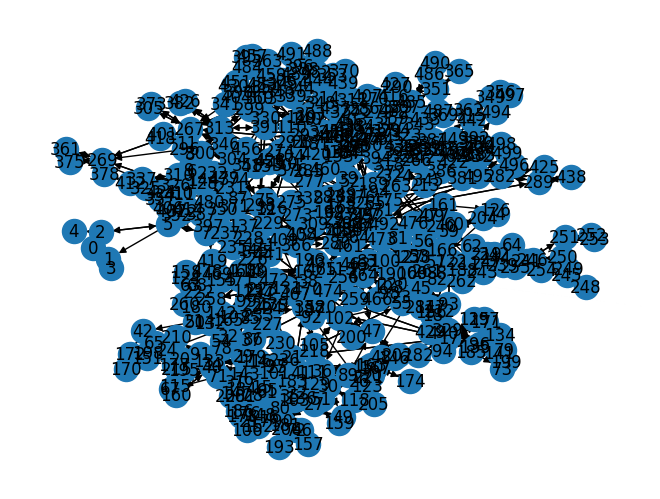

In [9]:
# Drawing the original graph
nx.draw(graph, with_labels=True)
plt.show()

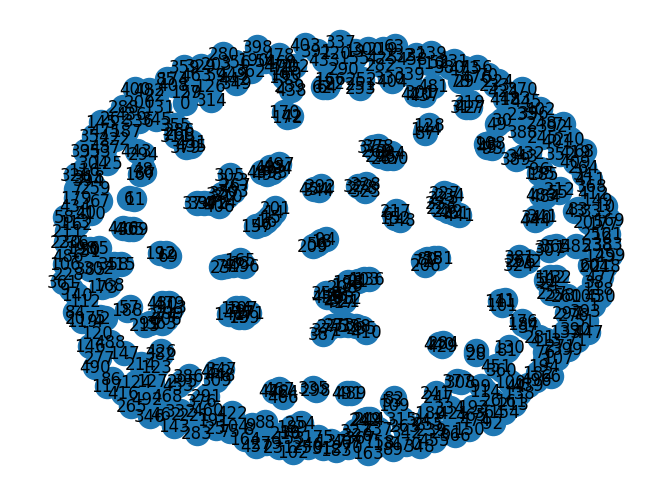

In [10]:
nx.draw(sampled_graphs[10], with_labels=True)
plt.show()